In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [61]:
df = pd.read_csv('GLD.csv')

In [62]:
df.columns

Index(['Unnamed: 0', 'Date', 'AdjClose', 'Open', 'High', 'Low', 'Close',
       'Volume', 'avg7', 'avg10', 'avg50', 'avg100', 'avg200', 'avg253',
       'SPD_OPEN/CLOSE', 'SPD_HIGH/LOW', 'Adj_Close_Returns', 'Close_Returns',
       'Log_Returns', 'pos_string', 'count_pos_string', 'macd', 'signal',
       'hist', 'MACD_1DAY_strategy', 'MACD_9DAY_strategy',
       'MACD_CONVERGENCE_strategy', 'RSI', 'RSI_strategy', 'OBV', 'OBV_EMA',
       'OBV_strategy', 'TSF', 'TSF_strategy', 'WILLR', 'WILLR_strategy',
       'STOCH_K', 'STOCH_D', 'STOCH_K_strategy', 'STOCH_D_strategy', 'EMA',
       'TEMA', 'upperband', 'middleband', 'lowerband', 'MOM', 'stok', 'stod',
       'CCI', 'direction'],
      dtype='object')

In [63]:
#df = df[['AdjClose','avg10','macd','RSI','WILLR','Open','High','Low','avg7','SPD_OPEN/CLOSE','SPD_HIGH/LOW','macd','OBV','TSF','stok','stod','EMA','TEMA','upperband','middleband','lowerband', 'MOM','ROC','CCI','Turning_line', 'Standard_line', 'ichimoku_span1', 'ichimoku_span2']]
df = df[['Date','Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]

In [64]:
"""def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0"""

'def classify(current, future):\n    if float(future) > float(current):\n        return 1\n    else:\n        return 0'

In [65]:
"""df['future'] = df['AdjClose'].shift(-1)
df['target'] = list(map(classify, df['AdjClose'], df['future']))
df.dropna(inplace=True)"""

"df['future'] = df['AdjClose'].shift(-1)\ndf['target'] = list(map(classify, df['AdjClose'], df['future']))\ndf.dropna(inplace=True)"

In [66]:
df

,Date,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,2000-10-23 00:00:00,-0.004064,270.100006,271.580002,-0.742933,45.130560,5.820149,8.757263,-100.000000,-1
1,2000-10-24 00:00:00,0.000000,270.100006,271.580002,-0.798274,45.130560,5.820149,7.321651,-100.000000,1
2,2000-10-25 00:00:00,-0.014544,266.200012,270.960004,-1.143646,37.567697,-3.225789,2.804836,-109.677367,-1
3,2000-10-26 00:00:00,-0.004896,264.899994,270.400003,-1.504909,35.435977,-10.672624,-2.692755,-122.340504,-1
4,2000-10-27 00:00:00,-0.001889,264.399994,269.200003,-1.810685,34.622255,-14.036558,-9.311657,-110.091804,-1
...,...,...,...,...,...,...,...,...,...,...
5302,2022-02-07 00:00:00,0.007719,1820.599976,1809.550000,-0.247097,52.994472,28.226649,22.783322,-54.040451,1
5303,2022-02-08 00:00:00,0.003290,1826.599976,1806.940002,0.975345,54.805799,41.470204,30.508723,-43.939424,1
5304,2022-02-09 00:00:00,0.004697,1835.199951,1807.469995,2.608021,57.343076,57.519599,42.405484,-29.461328,1
5305,2022-02-10 00:00:00,0.000545,1836.199951,1811.759985,3.937234,57.640873,66.273808,55.087870,-27.777824,1


In [67]:
df['direction'].value_counts()

 1    2824
-1    2483
Name: direction, dtype: int64

In [68]:
"""df = df.drop('future',axis=1)"""

"df = df.drop('future',axis=1)"

In [69]:
"""df_norm = df
def normalizeandscale(df_norm):
    for col in df_norm.columns:
        if col != 'target':
            df_norm[col] = preprocessing.scale(df_norm[col].values)
            df_norm[col] = df_norm[col]/df_norm[col].abs().max()
    return df_norm"""

"df_norm = df\ndef normalizeandscale(df_norm):\n    for col in df_norm.columns:\n        if col != 'target':\n            df_norm[col] = preprocessing.scale(df_norm[col].values)\n            df_norm[col] = df_norm[col]/df_norm[col].abs().max()\n    return df_norm"

In [70]:
#normalizeandscale(df_norm)

In [71]:
df_norm = df[['Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]
for col in df_norm.columns:
        if col != 'direction':
            df_norm[col]=(df_norm[col].values-np.min(df_norm[col]))/(np.max(df_norm[col])-np.min(df_norm[col]))
            df_norm.dropna(inplace=True)
            preprocessing.scale(df_norm[col].values)

df_norm

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.509872,0.008350,0.007852,0.433052,0.400497,0.407459,0.398275,0.533787,-1
1,0.531884,0.008350,0.007852,0.432605,0.400497,0.407459,0.391187,0.533787,1
2,0.453112,0.006179,0.007494,0.429816,0.294498,0.366123,0.368889,0.509451,-1
3,0.505370,0.005455,0.007170,0.426900,0.264620,0.332095,0.341748,0.477607,-1
4,0.521652,0.005177,0.006477,0.424431,0.253215,0.316723,0.309071,0.508409,-1
...,...,...,...,...,...,...,...,...,...
5302,0.573693,0.871465,0.896456,0.437055,0.510715,0.509846,0.467520,0.649362,1
5303,0.549704,0.874805,0.894948,0.446924,0.536102,0.570363,0.505659,0.674764,1
5304,0.557324,0.879592,0.895255,0.460105,0.571664,0.643701,0.564392,0.711172,1
5305,0.534835,0.880149,0.897733,0.470837,0.575838,0.683703,0.627004,0.715406,1


In [72]:
df_norm.describe()

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
count,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000
mean,0.533839,0.443391,0.457773,0.455458,0.505529,0.578093,0.568072,0.642354,0.064255
std,0.060327,0.275426,0.285721,0.102994,0.169691,0.176363,0.184438,0.105748,0.998028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.505554,0.178802,0.184698,0.407765,0.388667,0.420876,0.401171,0.551778,-1.000000
50%,0.534497,0.523491,0.542198,0.449881,0.498096,0.587829,0.579332,0.648521,1.000000
75%,0.565550,0.617930,0.635472,0.504942,0.626249,0.744428,0.743279,0.740963,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df_norm.drop('AdjClose',axis = 1, inplace=True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
df_norm

,Log_Returns,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.509872,0.007852,0.433052,0.400497,0.407459,0.398275,0.533787,-1
1,0.531884,0.007852,0.432605,0.400497,0.407459,0.391187,0.533787,1
2,0.453112,0.007494,0.429816,0.294498,0.366123,0.368889,0.509451,-1
3,0.505370,0.007170,0.426900,0.264620,0.332095,0.341748,0.477607,-1
4,0.521652,0.006477,0.424431,0.253215,0.316723,0.309071,0.508409,-1
...,...,...,...,...,...,...,...,...
5302,0.573693,0.896456,0.437055,0.510715,0.509846,0.467520,0.649362,1
5303,0.549704,0.894948,0.446924,0.536102,0.570363,0.505659,0.674764,1
5304,0.557324,0.895255,0.460105,0.571664,0.643701,0.564392,0.711172,1
5305,0.534835,0.897733,0.470837,0.575838,0.683703,0.627004,0.715406,1


In [75]:
times= sorted(df_norm.index.values)
"""last20_pct=sorted(df_norm.index.values)[-int(0.2*len(times))]
validation_df_norm=df_norm[(df_norm.index>=last20_pct)]
df_norm=df_norm[(df_norm.index<last20_pct)]"""
last30_pct=sorted(df_norm.index.values)[-int(0.3*len(times))]
test=df_norm[(df_norm.index>=last30_pct)]
train=df_norm[(df_norm.index<last30_pct)]

In [76]:
train.drop('Log_Returns', axis = 1, inplace = True)
test.drop('Log_Returns', axis = 1, inplace = True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
train

,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.007852,0.433052,0.400497,0.407459,0.398275,0.533787,-1
1,0.007852,0.432605,0.400497,0.407459,0.391187,0.533787,1
2,0.007494,0.429816,0.294498,0.366123,0.368889,0.509451,-1
3,0.007170,0.426900,0.264620,0.332095,0.341748,0.477607,-1
4,0.006477,0.424431,0.253215,0.316723,0.309071,0.508409,-1
...,...,...,...,...,...,...,...
3710,0.506746,0.480511,0.560070,0.725538,0.697997,0.708931,-1
3711,0.507341,0.490417,0.619949,0.759513,0.729850,0.779335,1
3712,0.509242,0.503131,0.659924,0.781941,0.759973,0.775263,1
3713,0.511478,0.512942,0.664068,0.824987,0.795788,0.779998,1


## HPELM

In [78]:
X_train = np.array(train.iloc[:,:-1])
y_train = np.array(train.iloc[:,-1])

X_test = np.array(test.iloc[:,:-1])
y_test = np.array(test.iloc[:,-1])

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import random

In [80]:
random.seed(1234)

In [81]:
"""from hpelm import HPELM
import matplotlib.pyplot as plt
loss_train=[]
loss_test=[]
acc_train=[]
acc_test=[]

ranger = range(5,400,5)

for i in ranger:
    elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
    elm.add_neurons(i, "sigm") #tanh lavora peggio
    #elm.add_neurons(1, 'sigm')
    elm.train(X_train,y_train)
    y_predicted = elm.predict(X_train)
    y_predicted_test = elm.predict(X_test)
    y_pred = []
    for j in y_predicted:
        if j > np.mean(y_predicted):
            y_pred.append(1)
        else:
            y_pred.append(-1)

    y_pred_test = []
    for j in y_predicted_test:
        if j > np.mean(y_predicted_test):
            y_pred_test.append(1)
        else:
            y_pred_test.append(-1)
    print(f'\n model with {i} neurons')
    print('accuracy train: ', accuracy_score(y_train, y_pred))
    print('accuracy test: ', accuracy_score(y_test, y_pred_test))
    print('loss train: ', log_loss(y_train, y_pred))
    print('loss test: ', log_loss(y_test, y_pred_test))

    loss_train.append(log_loss(y_train, y_pred))
    loss_test.append(log_loss(y_test, y_pred_test))

    acc_train.append(accuracy_score(y_train, y_pred))
    acc_test.append(accuracy_score(y_test, y_pred_test))"""

'from hpelm import HPELM\nimport matplotlib.pyplot as plt\nloss_train=[]\nloss_test=[]\nacc_train=[]\nacc_test=[]\n\nranger = range(5,400,5)\n\nfor i in ranger:\n    elm = HPELM(X_train.shape[1], 1,\'c\', batch = 24)\n    elm.add_neurons(i, "sigm") #tanh lavora peggio\n    #elm.add_neurons(1, \'sigm\')\n    elm.train(X_train,y_train)\n    y_predicted = elm.predict(X_train)\n    y_predicted_test = elm.predict(X_test)\n    y_pred = []\n    for j in y_predicted:\n        if j > np.mean(y_predicted):\n            y_pred.append(1)\n        else:\n            y_pred.append(-1)\n\n    y_pred_test = []\n    for j in y_predicted_test:\n        if j > np.mean(y_predicted_test):\n            y_pred_test.append(1)\n        else:\n            y_pred_test.append(-1)\n    print(f\'\n model with {i} neurons\')\n    print(\'accuracy train: \', accuracy_score(y_train, y_pred))\n    print(\'accuracy test: \', accuracy_score(y_test, y_pred_test))\n    print(\'loss train: \', log_loss(y_train, y_pred))\n  

In [82]:
"""plt.title('loss')
plt.plot(ranger,loss_train, label='train')
plt.plot(ranger,loss_test, label = 'test')"""

"plt.title('loss')\nplt.plot(ranger,loss_train, label='train')\nplt.plot(ranger,loss_test, label = 'test')"

In [83]:
"""plt.title('accuracy')
plt.plot(ranger,acc_train, label = 'train')
plt.plot(ranger,acc_test, label = 'test')"""

"plt.title('accuracy')\nplt.plot(ranger,acc_train, label = 'train')\nplt.plot(ranger,acc_test, label = 'test')"

In [84]:
from hpelm import HPELM

elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
elm.add_neurons(140, "sigm") #tanh lavora peggio
#elm.add_neurons(1, 'sigm')
elm.train(X_train,y_train)

In [85]:
y_predicted = elm.predict(X_train)
y_predicted_test = elm.predict(X_test)

In [86]:
#If OTS > Mean (OTS), predicted trend is up (1) else down (0).
y_pred = []
for i in y_predicted:
    if i > np.mean(y_predicted):
        y_pred.append(1)
    elif i == np.mean(y_predicted):
        y_pred.append(0)
    else:
        y_pred.append(-1)

y_pred_test = []
for i in y_predicted_test:
    if i > np.mean(y_predicted_test):
        y_pred_test.append(1)
    elif i == np.mean(y_predicted):
        y_pred_test.append(0)
    else:
        y_pred_test.append(-1)

In [87]:
print('accuracy train: ', accuracy_score(y_train, y_pred))
print('accuracy test: ', accuracy_score(y_test, y_pred_test))

accuracy train:  0.8358008075370121
accuracy test:  0.8046482412060302


In [88]:
print('loss train: ', log_loss(y_train, y_pred))
print('loss test: ', log_loss(y_test, y_pred_test))

loss train:  5.671297951815333
loss test:  6.747278520395917


## Train

In [89]:
train_eval = pd.DataFrame(df['Log_Returns'])
train_eval.set_index(df.index)

,Log_Returns
0,-0.004064
1,0.000000
2,-0.014544
3,-0.004896
4,-0.001889
...,...
5302,0.007719
5303,0.003290
5304,0.004697
5305,0.000545


In [90]:
train_eval = train_eval.loc[:3714]

In [91]:
train_eval

,Log_Returns
0,-0.004064
1,0.000000
2,-0.014544
3,-0.004896
4,-0.001889
...,...
3710,-0.003749
3711,0.010083
3712,0.007410
3713,0.000772


In [92]:
train_eval['strat_hpelm'] = y_pred

In [93]:
train_eval['hpelm_Returns'] = train_eval['strat_hpelm']*train_eval['Log_Returns']

In [94]:
train_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns      4.351401e+00
hpelm_Returns    7.049054e+11
dtype: float64

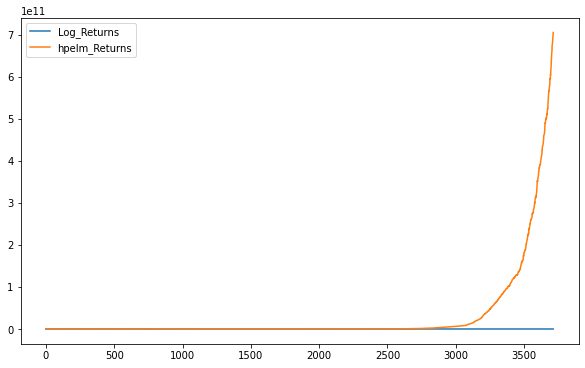

In [95]:
train_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Test

In [96]:
test_eval = pd.DataFrame(df['Log_Returns'])
test_eval.set_index(df.index)

,Log_Returns
0,-0.004064
1,0.000000
2,-0.014544
3,-0.004896
4,-0.001889
...,...
5302,0.007719
5303,0.003290
5304,0.004697
5305,0.000545


In [97]:
test_eval = test_eval.loc[3715:]

In [98]:
test_eval

,Log_Returns
3715,0.006588
3716,-0.003626
3717,-0.008740
3718,0.003998
3719,-0.008868
...,...
5302,0.007719
5303,0.003290
5304,0.004697
5305,0.000545


In [99]:
test_eval['strat_hpelm'] = y_pred_test

In [100]:
test_eval['hpelm_Returns'] = test_eval['strat_hpelm']*test_eval['Log_Returns']

In [101]:
test_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns         1.559868
hpelm_Returns    4771.715538
dtype: float64

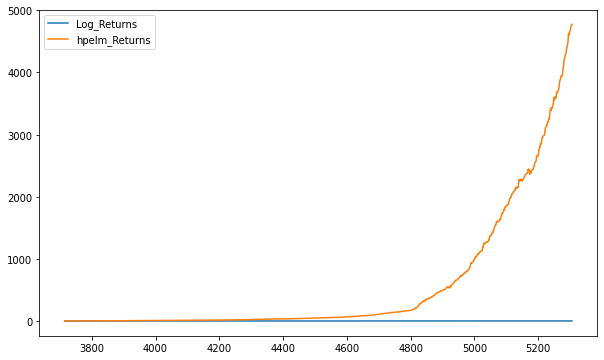

In [102]:
test_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [103]:
output = df[['Date','Log_Returns','AdjClose']]

In [104]:
output

,Date,Log_Returns,AdjClose
0,2000-10-23 00:00:00,-0.004064,270.100006
1,2000-10-24 00:00:00,0.000000,270.100006
2,2000-10-25 00:00:00,-0.014544,266.200012
3,2000-10-26 00:00:00,-0.004896,264.899994
4,2000-10-27 00:00:00,-0.001889,264.399994
...,...,...,...
5302,2022-02-07 00:00:00,0.007719,1820.599976
5303,2022-02-08 00:00:00,0.003290,1826.599976
5304,2022-02-09 00:00:00,0.004697,1835.199951
5305,2022-02-10 00:00:00,0.000545,1836.199951


In [105]:
output_test = pd.merge(output, test_eval, left_index = True, right_index=True)
output_test.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_test.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_test.set_index('Date', inplace=True)


In [106]:
output_train = pd.merge(output, train_eval, left_index = True, right_index=True)
output_train.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_train.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_train.set_index('Date', inplace=True)

In [107]:
output_train

,Log_Returns,strat_hpelm
Date,,
2000-10-23 00:00:00,-0.004064,-1
2000-10-24 00:00:00,0.000000,-1
2000-10-25 00:00:00,-0.014544,-1
2000-10-26 00:00:00,-0.004896,-1
2000-10-27 00:00:00,-0.001889,-1
...,...,...
2015-10-08 00:00:00,-0.003749,-1
2015-10-09 00:00:00,0.010083,1
2015-10-12 00:00:00,0.007410,1


In [108]:
output_test

,Log_Returns,strat_hpelm
Date,,
2015-10-15 00:00:00,0.006588,1
2015-10-16 00:00:00,-0.003626,1
2015-10-19 00:00:00,-0.008740,-1
2015-10-20 00:00:00,0.003998,1
2015-10-21 00:00:00,-0.008868,-1
...,...,...
2022-02-07 00:00:00,0.007719,1
2022-02-08 00:00:00,0.003290,1
2022-02-09 00:00:00,0.004697,1


In [109]:
output_train.to_csv('GLD_strategy_hpelm_train.csv')

In [110]:
output_test.to_csv('GLD_strategy_hpelm_test.csv')